# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html               ## Pulling in the website content 

bs = soup(html, 'html.parser')

In [5]:
# Extract all rows of data       

# Finding all table rows that contain the data
all_rows = bs.find_all('tr', class_='data-row')

all_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Empty list to hold lists of each row data and turning it into a list
data_list = []

# Finding all table rows that contain the data
all_rows = bs.find_all('tr', class_='data-row')

# Iterating through each row
for row in all_rows:
  # Finding the actual data in each row
    all_row_data = row.find_all('td')
    # Empty list to hold the each row of data
    row_l = []
  # Extracting the data from each row in the table
    for row_data in all_row_data:
        # Appending each row of data into the list "row_l"
        row_l.append(row_data.text.strip())
        # Appending the list of rows of data into "data_list"
    data_list.append(row_l)

# Displaying the list
data_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data_list, columns = ['id','terrestrial_date','sol','ls','month','min_temp','pressure'])

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column

mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

# Converting "terrestrial_date" column data into datetime64[ns]
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Converting "sol" column data into int64
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int64')

# Converting "ls" column data into int64
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int64')

# Corverting 'month' column data into int64
mars_weather_df['month'] = mars_weather_df['month'].astype('int64')

# Converting "min_temp" column data into float64
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype('float64')

# Converting "pressure" column data into int64
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

# Using .value_counts() to find the how many times each month appears in the dataset
# .sort_index() sorts the series by months in ascending order
mars_weather_df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?

# Using .count() on the column "sol" to find the quanity of Martian days worth of data there is 
total_martian_days = mars_weather_df['sol'].count()
total_martian_days

1867

In [14]:
# 3. What is the average low temperature by month?

# Using .groupby() to group by "months" and "min_temp" columns to then calulate the average min_temp using .mean()
# .sort_index() sorts the series by months in ascending order
months_avg_low_temp = mars_weather_df.groupby(['month'])['min_temp'].mean()
months_avg_low_temp.sort_index()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

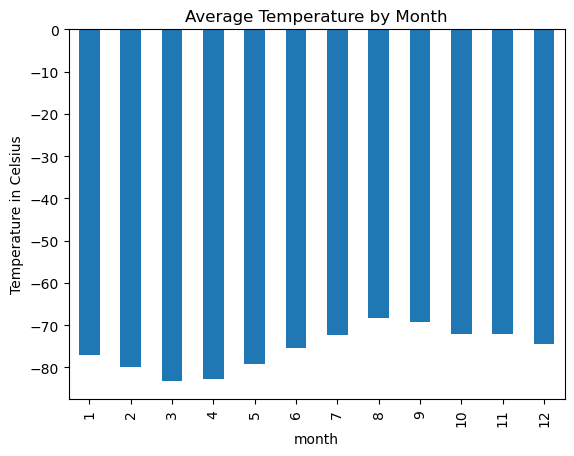

In [15]:
# Plot the average temperature by month

# Plotting a bar chart using series.plot method
months_avg_low_temp.plot(kind = "bar")

# Adding in x & y-labels w/ plot title
plt.title('Average Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

# Displaying bar chart
plt.show()

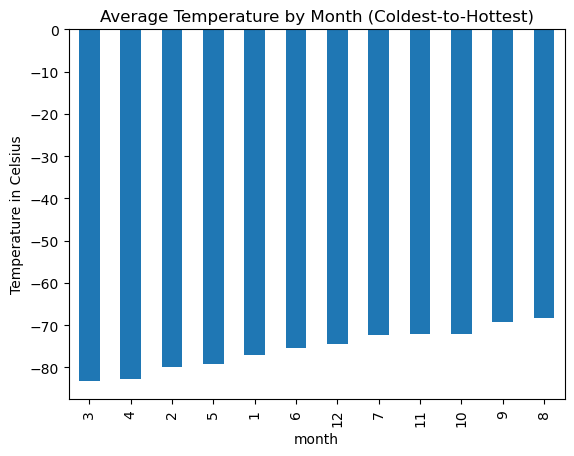

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# Sorting the average minimum temperatures per month in "months_avg_low_temp" series in ascending order
coldest_to_hottest_months = months_avg_low_temp.sort_values()

# Plotting a bar chart using series.plot method
coldest_to_hottest_months.plot(kind = 'bar')

# Adding in x & y-labels w/ plot title
plt.title('Average Temperature by Month (Coldest-to-Hottest)')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

# Displaying bar chart
plt.show()

In [17]:
# 4. Average pressure by Martian month

# Using .groupby() to group by "months" and "pressure" columns to then calulate the average pressure using .mean()
# .sort_index() sorts the series by months in ascending order
months_avg_pressure = mars_weather_df.groupby(['month'])['pressure'].mean()
months_avg_pressure.sort_index()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

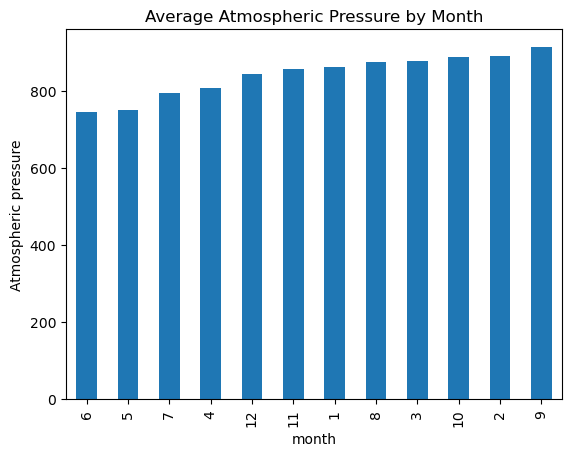

In [19]:
# Plot the average pressure by month

# Sorting the average atmospheric pressure per month in "months_avg_pressure" series in ascending order
lowest_to_highest_pressure_months = months_avg_pressure.sort_values()


# Plotting a bar chart using series.plot method
lowest_to_highest_pressure_months.plot(kind = 'bar')

# Adding in x & y-labels w/ plot title
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric pressure')

# Displaying bar chart
plt.show()

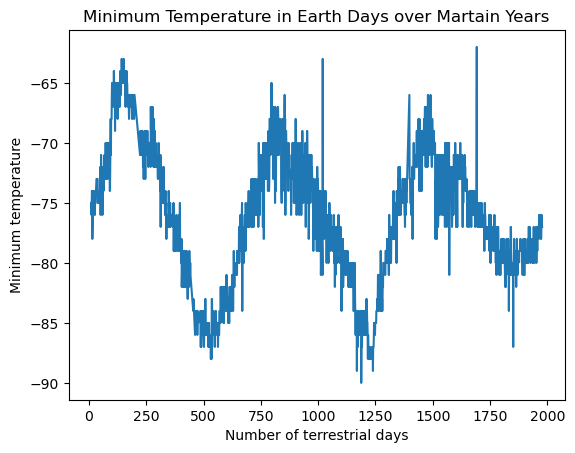

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Defining x & y-axis
x_axis = mars_weather_df['sol']
y_axis = mars_weather_df['min_temp']

# Creating plot
plt.plot(x_axis, y_axis)

# Adding in x & y-labels w/ plot title
plt.title('Minimum Temperature in Earth Days over Martain Years')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')


# Displaying plot
plt.show()

**Which month, on average, has the lowest temperature? The highest?** 

On average, the coldest month on Mars in the third month with the forth month being almost just as cold but the third month is slightly colder on average. The eighth month is the warmest with the ninth month being a very close second warmest. As show by the graph above titled "Average Temperature by Month (Coldest-to-Hottest)", Mars tends to have colder months in the first half of its yearly cycle with the warmer weather coming towards the back half of the year. Although the last half of months on Mars tend to be warm on average these tempetures of far below freezing (0 degrees Celsius / 32 degrees Fahrenheit) year round is extremely cold in human terms compared to the weather that we experience here on Earth. 


**Which month, on average, has the lowest atmospheric pressure? The highest?**

On average, the atmospheric pressure is lowest on Mars in the sixth month. The atmospheric pressure is highest on Mars in the ninth month. There seems to be no pattern between when the atmospheric pressure increases or decreases but as shown by the graph above titled "Average Atmospheric Pressure by Month", it seems like the atmospheric pressure tends to be lower on Mars during the "middle" months of the year (4,5,6,7).

**How many terrestrial days exist in a Martian year?**



As shown by the graph above titled "Minimum Temperature in Earth Days over Martain Years" The distance from peak to peak is roughly (875-200), (1550-875), or 675 days. A year on Mars appears to be about 675 earth days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [39]:
# Write the data to a CSV
mars_weather_df.to_csv('scrapping_output_data/mars_weather_data')

In [21]:
browser.quit()